In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from zipfile import ZipFile
import rasterio
import os
from netCDF4 import Dataset
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm
from cartopy.feature import NaturalEarthFeature
import cartopy.crs as ccrs
import cartopy
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
df1 = pd.read_csv('./Soil_Moisture/sparta.daily.csv', skiprows=lambda x: x in range(8))
df1 = df1[:-45]

In [ ]:
atmpmax = [np.array(df1['atmp_10cm_max']).astype('float'), np.array(df1['atmp_max']).astype('float'), np.array(df1['atmp_10m_max']).astype('float'), np.array(df1['atmp_20m_max']).astype('float')]
atmpmin = [np.array(df1['atmp_10cm_min']).astype('float'), np.array(df1['atmp_min']).astype('float'), np.array(df1['atmp_10m_min']).astype('float'), np.array(df1['atmp_20m_min']).astype('float')]

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8))

ax1.plot(atmpmax[0], 'b', lw=1)
ax1.plot(atmpmax[1], 'r', lw=1)
ax1.plot(atmpmax[2], 'y', lw=1)
ax1.plot(atmpmax[3], 'g', lw=1)
ax1.set_ylim(-30, 40)
ax1.set_ylabel('atmp max', fontsize=15)
ax1.legend(['10 cm', '1.5 m', '10 m', '20 m'], fontsize='large')

ax2.plot(atmpmin[0], 'b', lw=1)
ax2.plot(atmpmin[1], 'r', lw=1)
ax2.plot(atmpmin[2], 'y', lw=1)
ax2.plot(atmpmin[3], 'g', lw=1)
ax2.set_ylim(-30, 40)
ax2.set_ylabel('atmp min', fontsize=15)
ax2.set_xticks(np.arange(0, 1287, 143))
ax2.set_xticklabels([df1['date'][i] for i in range(0, 1144, 143)]+[df1['date'][1143]], fontsize=12)

plt.suptitle('Daily Air temperature in Sparta', fontsize=15, fontweight='bold')

plt.savefig('./Soil_Moisture/plot/atmp_sparta.png')

In [ ]:
soilmax = [np.array(df1['soil0_max']).astype('float'), np.array(df1['soil1_max']).astype('float'), np.array(df1['soil_20cm_max']).astype('float'), np.array(df1['soil_50cm_max']).astype('float'), np.array(df1['soil_100cm_max']).astype('float')]
soilmin = [np.array(df1['soil0_min']).astype('float'), np.array(df1['soil1_min']).astype('float'), np.array(df1['soil_20cm_min']).astype('float'), np.array(df1['soil_50cm_min']).astype('float'), np.array(df1['soil_100cm_min']).astype('float')]

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8))

ax1.plot(soilmax[0], 'b', lw=1)
ax1.plot(soilmax[1], 'r', lw=1)
ax1.plot(soilmax[2], 'y', lw=1)
ax1.plot(soilmax[3], 'g', lw=1)
ax1.plot(soilmax[4], 'c', lw=1)
ax1.set_ylim(-10, 30)
ax1.set_ylabel('soil max', fontsize=15)
ax1.legend(['5 cm', '10 cm', '20 cm', '50 cm', '100 cm'], fontsize='large')

ax2.plot(soilmin[0], 'b', lw=1)
ax2.plot(soilmin[1], 'r', lw=1)
ax2.plot(soilmin[2], 'y', lw=1)
ax2.plot(soilmin[3], 'g', lw=1)
ax2.plot(soilmin[4], 'c', lw=1)
ax2.set_ylim(-10, 30)
ax2.set_ylabel('soil min', fontsize=15)
ax2.set_xticks(np.arange(0, 1287, 143))
ax2.set_xticklabels([df1['date'][i] for i in range(0, 1144, 143)]+[df1['date'][1143]], fontsize=12)

plt.suptitle('Daily Soil temperature in Sparta', fontsize=15, fontweight='bold')

plt.savefig('./Soil_Moisture/plot/soiltemp_sparta.png')

In [ ]:
mstrmax = [np.array(df1['mstr0_max']).astype('float'), np.array(df1['mstr1_max']).astype('float'), np.array(df1['mstr_90cm_max']).astype('float'), np.array(df1['mstr_120cm_max']).astype('float')]
mstrmin = [np.array(df1['mstr0_min']).astype('float'), np.array(df1['mstr1_min']).astype('float'), np.array(df1['mstr_90cm_min']).astype('float'), np.array(df1['mstr_120cm_min']).astype('float')]

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8))

ax1.plot(mstrmax[0], 'b', lw=1)
ax1.plot(mstrmax[1], 'r', lw=1)
ax1.plot(mstrmax[2], 'y', lw=1)
ax1.plot(mstrmax[3], 'g', lw=1)
ax1.set_ylim(0, .7)
ax1.set_ylabel('mstr max', fontsize=15)

ax2.plot(mstrmin[0], 'b', lw=1)
ax2.plot(mstrmin[1], 'r', lw=1)
ax2.plot(mstrmin[2], 'y', lw=1)
ax2.plot(mstrmin[3], 'g', lw=1)
ax2.set_ylim(0, .7)
ax2.set_ylabel('mstr min', fontsize=15)
ax2.set_xticks(np.arange(0, 1287, 143))
ax2.set_xticklabels([df1['date'][i] for i in range(0, 1144, 143)]+[df1['date'][1143]], fontsize=12)
ax2.legend(['0-30 cm', '30-60 cm', '60-90 cm', '90-120 cm'], fontsize='large')

plt.suptitle('Daily Soil Moisture  in Sparta', fontsize=15, fontweight='bold')

plt.savefig('./Soil_Moisture/plot/soilMoisture_sparta.png')

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df1.nrad_max, 'b', lw=1)
plt.plot(df1.nrad_min, 'r', lw=1)
plt.plot(df1.sden_max, 'g', lw=1)
plt.plot(df1.sflux_max, 'y', lw=1)
plt.plot(df1.sflux_min, 'c', lw=1)
# plt.plot(df1.srad / 3.6, 'pink', lw=1)
plt.xticks(ticks=np.arange(0, 1287, 143), labels=[df1['date'][i] for i in range(0, 1144, 143)]+[df1['date'][1143]], fontsize=12)
plt.legend(['Max Net Radiation $(W/m^2)$', 'Min Net Radiation', 'Max Solar Flux', 'Max Soil Heat Flux', 'Min Soil Heat Flux'])
plt.title('Flux and Radiation in Sparta', fontsize=15, fontweight='bold')

In [ ]:
df2 = pd.read_csv('./Soil_Moisture/williamsburg.daily.csv', skiprows=lambda x: x in range(8))
df2 = df2[:-45]

In [ ]:
atmpmax = [np.array(df2['atmp_10cm_max']).astype('float'), np.array(df2['atmp_max']).astype('float'), np.array(df2['atmp_10m_max']).astype('float'), np.array(df2['atmp_20m_max']).astype('float')]
atmpmin = [np.array(df2['atmp_10cm_min']).astype('float'), np.array(df2['atmp_min']).astype('float'), np.array(df2['atmp_10m_min']).astype('float'), np.array(df2['atmp_20m_min']).astype('float')]

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8))

ax1.plot(atmpmax[0], 'b', lw=1)
ax1.plot(atmpmax[1], 'r', lw=1)
ax1.plot(atmpmax[2], 'y', lw=1)
ax1.plot(atmpmax[3], 'g', lw=1)
ax1.set_ylim(-30, 40)
ax1.set_ylabel('atmp max', fontsize=15)
ax1.legend(['10 cm', '1.5 m', '10 m', '20 m'], fontsize='large')

ax2.plot(atmpmin[0], 'b', lw=1)
ax2.plot(atmpmin[1], 'r', lw=1)
ax2.plot(atmpmin[2], 'y', lw=1)
ax2.plot(atmpmin[3], 'g', lw=1)
ax2.set_ylim(-30, 40)
ax2.set_ylabel('atmp min', fontsize=15)
ax2.set_xticks(np.arange(0, 1130, 141))
ax2.set_xticklabels([df2['date'][i] for i in range(0, 1130, 141)]+[df2['date'][1128]], fontsize=12)

plt.suptitle('Daily Air temperature in Williamsburg', fontsize=15, fontweight='bold')

plt.savefig('./Soil_Moisture/plot/atmp_Williamsburg.png')

In [ ]:
soilmax = [np.array(df2['soil0_max']).astype('float'), np.array(df2['soil1_max']).astype('float'), np.array(df2['soil_20cm_max']).astype('float'), np.array(df2['soil_50cm_max']).astype('float'), np.array(df2['soil_100cm_max']).astype('float')]
soilmin = [np.array(df2['soil0_min']).astype('float'), np.array(df2['soil1_min']).astype('float'), np.array(df2['soil_20cm_min']).astype('float'), np.array(df2['soil_50cm_min']).astype('float'), np.array(df2['soil_100cm_min']).astype('float')]

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8))

ax1.plot(soilmax[0], 'b', lw=1)
ax1.plot(soilmax[1], 'r', lw=1)
ax1.plot(soilmax[2], 'y', lw=1)
ax1.plot(soilmax[3], 'g', lw=1)
ax1.plot(soilmax[4], 'c', lw=1)
ax1.set_ylim(-10, 30)
ax1.set_ylabel('soil max', fontsize=15)
ax1.legend(['5 cm', '10 cm', '20 cm', '50 cm', '100 cm'], fontsize='large')

ax2.plot(soilmin[0], 'b', lw=1)
ax2.plot(soilmin[1], 'r', lw=1)
ax2.plot(soilmin[2], 'y', lw=1)
ax2.plot(soilmin[3], 'g', lw=1)
ax2.plot(soilmin[4], 'c', lw=1)
ax2.set_ylim(-10, 30)
ax2.set_ylabel('soil min', fontsize=15)
ax2.set_xticks(np.arange(0, 1130, 141))
ax2.set_xticklabels([df2['date'][i] for i in range(0, 1130, 141)]+[df2['date'][1128]], fontsize=12)

plt.suptitle('Daily Soil temperature in Williamsburg', fontsize=15, fontweight='bold')

plt.savefig('./Soil_Moisture/plot/soiltemp_Williamsburg.png')

In [ ]:
mstrmax = [np.array(df2['mstr0_max']).astype('float'), np.array(df2['mstr1_max']).astype('float'), np.array(df2['mstr_90cm_max']).astype('float'), np.array(df2['mstr_120cm_max']).astype('float')]
mstrmin = [np.array(df2['mstr0_min']).astype('float'), np.array(df2['mstr1_min']).astype('float'), np.array(df2['mstr_90cm_min']).astype('float'), np.array(df2['mstr_120cm_min']).astype('float')]

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8))

ax1.plot(mstrmax[0], 'b', lw=1)
ax1.plot(mstrmax[1], 'r', lw=1)
ax1.plot(mstrmax[2], 'y', lw=1)
ax1.plot(mstrmax[3], 'g', lw=1)
ax1.set_ylim(0, .7)
ax1.set_ylabel('mstr max', fontsize=15)

ax2.plot(mstrmin[0], 'b', lw=1)
ax2.plot(mstrmin[1], 'r', lw=1)
ax2.plot(mstrmin[2], 'y', lw=1)
ax2.plot(mstrmin[3], 'g', lw=1)
ax2.set_ylim(0, .7)
ax2.set_ylabel('mstr min', fontsize=15)
ax2.set_xticks(np.arange(0, 1130, 141))
ax2.set_xticklabels([df2['date'][i] for i in range(0, 1130, 141)]+[df2['date'][1128]], fontsize=12)
ax2.legend(['0-30 cm', '30-60 cm', '60-90 cm', '90-120 cm'], fontsize='large')

plt.suptitle('Daily Soil Moisture  in Williamsburg', fontsize=15, fontweight='bold')

plt.savefig('./Soil_Moisture/plot/soilMoisture_Williamsburg.png')

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df2.nrad_max, 'b', lw=1)
plt.plot(df2.nrad_min, 'r', lw=1)
plt.plot(df2.sden_max, 'g', lw=1)
plt.plot(df2.sflux_max, 'y', lw=1)
plt.plot(df2.sflux_min, 'c', lw=1)
# plt.plot(df2.srad / 3.6, 'pink', lw=1)
plt.xticks(ticks=np.arange(0, 1130, 141), labels=[df2['date'][i] for i in range(0, 1130, 141)]+[df2['date'][1128]], fontsize=12)
plt.legend(['Max Net Radiation $(W/m^2)$', 'Min Net Radiation', 'Max Solar Flux', 'Max Soil Heat Flux', 'Min Soil Heat Flux'])
plt.title('Flux and Radiation in Williamsburg', fontsize=15, fontweight='bold')

<font size=4 color=blue>validate wrfout

In [9]:
DIR = './prism/SoilM_WRF/'
fna = [name for name in os.listdir(DIR)]
fna.sort()
fno = len(fna)
for i in range(fno):
    z = ZipFile(DIR+fna[i])
    z.extractall(DIR+fna[i][:-4])

tmin = []
folder = './prism/SoilM_WRF/'
subfolders = [ f.path for f in os.scandir(folder) if f.is_dir() ]
for i in range(len(subfolders)):
    bil = rasterio.open(subfolders[i]+'/'+subfolders[i][18:]+'.bil')
    a = bil.read()[0, :357, 479:1201]
    tmin.append(a)
tmin = np.array(tmin)
np.savez_compressed('./prism/202005_tmin', tmin=tmin)

In [31]:
tmin = np.load('./prism/202005_tmin.npz')['tmin']
tmin = np.where(tmin<-100, np.nan, tmin)
lat = np.array([49.9166666666664 - i * 0.0416666666667 for i in range(357)])
lon = np.array([-105.0416666666507 + i * 0.0416666666667 for i in range(722)])
Lon, Lat = np.meshgrid(lon, lat)
date = ['May 12th', 'May 13th', 'May 8th', 'May 9th']
name = ['May12th', 'May13th', 'May8th', 'May9th']
extent = [-96.2, -79.35, 40.7, 49.52]

for ii in range(4):
    fig = plt.figure(figsize=(8, 6))
    ax = plt.axes(projection=ccrs.AlbersEqualArea(np.mean(extent[:2]), np.mean(extent[2:])))
    ax.set_extent(extent)
    states = NaturalEarthFeature(category="cultural", scale="50m",
                                 facecolor="none",
                                 name="admin_1_states_provinces_shp")
    ax.add_feature(states, linewidth=.3, edgecolor="black")
    ax.add_feature(cartopy.feature.BORDERS, lw=.1, linestyle=':')
    ax.add_feature(cartopy.feature.COASTLINE, lw=.1, linestyle=':')
    ax.add_feature(cartopy.feature.STATES.with_scale('10m'))

    levels = MaxNLocator(nbins=100).tick_values(-10, 10)
    cmap = plt.get_cmap('jet')
    norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

    pc = plt.pcolormesh(Lon, Lat, tmin[ii, :, :], cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
    plt.title(f'PRISM Daily minimum 2m Temperature (\u00b0C) on {date[ii]}', fontsize=15, fontweight='bold')

    fig.subplots_adjust(bottom=0, top=0.95, left=0.05, right=0.9)
    cb_ax = fig.add_axes([0.905, 0.07, 0.02, 0.815])
    cbar = fig.colorbar(pc, cax=cb_ax, ticks=np.arange(-10, 12, 2), extend='both')
    plt.savefig(f'./Soil_Moisture/plot/tmin_{name[ii]}.png')
    plt.close()

<font size=4 color=blue>initial soil moisture

In [2]:
wrfout = Dataset('./wrfout/orig/freeze1/wrfout_d01_2020-05-12_00:00:00')  # 'ISLTYP' 'SMOIS' 'IVGTYP'
lat = wrfout['XLAT'][0,:,:]
lon = wrfout['XLONG'][0,:,:]

In [3]:
veg =  pd.read_table('./var/IVGTYP.txt', skiprows=2, delimiter=',')
veg = veg[:28]

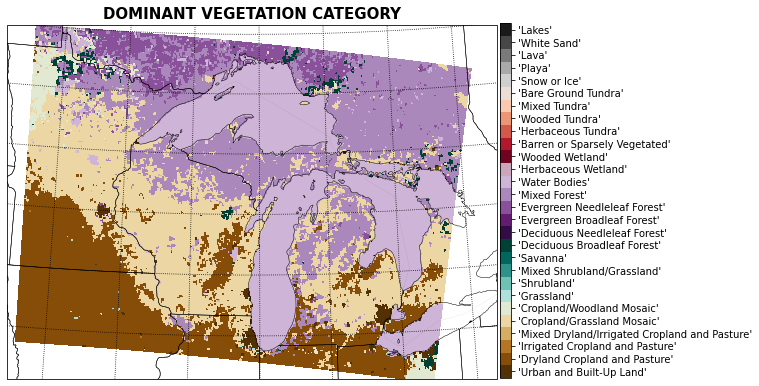

In [18]:
extent = [-96.2, -79.35, 40.7, 49.52]
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(np.mean(extent[:2]), np.mean(extent[2:])))
ax.set_extent(extent)
ax.add_feature(cartopy.feature.BORDERS, lw=.1, linestyle=':')
ax.add_feature(cartopy.feature.COASTLINE, lw=.1, linestyle=':')
ax.add_feature(cartopy.feature.STATES.with_scale('10m'), lw=.5)
ax.gridlines(color="black", linestyle="dotted", lw=.1)

cmap_name = '28color'
colors= ['#543005','#8c510a','#bf812d','#dfc27d','#f6e8c3','#c7eae5','#80cdc1','#35978f','#01665e','#003c30',
        '#40004b','#762a83','#9970ab','#c2a5cf','#e7d4e8','#67001f','#b2182b','#d6604d','#f4a582','#fddbc7',
        '#e0e0e0','#bababa','#878787','#4d4d4d','#1a1a1a']
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=28)
levels = MaxNLocator(nbins=28).tick_values(1, 29)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

pc = plt.pcolormesh(lon, lat, wrfout['IVGTYP'][0,:,:], cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
plt.title('DOMINANT VEGETATION CATEGORY', fontsize=15, fontweight='bold')

fig.subplots_adjust(bottom=0, top=0.95, left=0.05, right=0.9)
cb_ax = fig.add_axes([0.905, 0.068, 0.02, 0.82])
cbar = fig.colorbar(pc, cax=cb_ax, ticks=np.arange(1.5, 30))
cbar.ax.set_yticklabels([veg['type'][i].strip() for i in range(28)])

plt.savefig('./Soil_Moisture/plot/vegetation_category.png')

In [23]:
soityp =  pd.read_table('./var/ISLTYP.txt', skiprows=2, delimiter=',')
soityp = soityp[:19]
# soityp['type']
# soityp

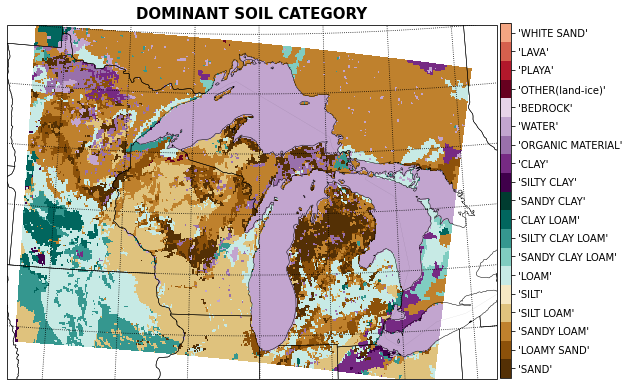

In [17]:
extent = [-96.2, -79.35, 40.7, 49.52]
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(np.mean(extent[:2]), np.mean(extent[2:])))
ax.set_extent(extent)
ax.add_feature(cartopy.feature.BORDERS, lw=.1, linestyle=':')
ax.add_feature(cartopy.feature.COASTLINE, lw=.1, linestyle=':')
ax.add_feature(cartopy.feature.STATES.with_scale('10m'), lw=.5)
ax.gridlines(color="black", linestyle="dotted", lw=.1)

cmap_name = '19color'
colors= ['#543005','#8c510a','#bf812d','#dfc27d','#f6e8c3','#c7eae5','#80cdc1','#35978f','#01665e','#003c30',
        '#40004b','#762a83','#9970ab','#c2a5cf','#e7d4e8','#67001f','#b2182b','#d6604d','#f4a582']
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=19)
levels = MaxNLocator(nbins=19).tick_values(1, 20)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

pc = plt.pcolormesh(lon, lat, wrfout['ISLTYP'][0,:,:], cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
plt.title('DOMINANT SOIL CATEGORY', fontsize=15, fontweight='bold')

fig.subplots_adjust(bottom=0, top=0.95, left=0.05, right=0.9)
cb_ax = fig.add_axes([0.905, 0.068, 0.02, 0.82])
cbar = fig.colorbar(pc, cax=cb_ax, ticks=np.arange(1.5, 21))
cbar.ax.set_yticklabels([soityp['type'][i].strip() for i in range(19)])

plt.savefig('./Soil_Moisture/plot/soil_category.png')

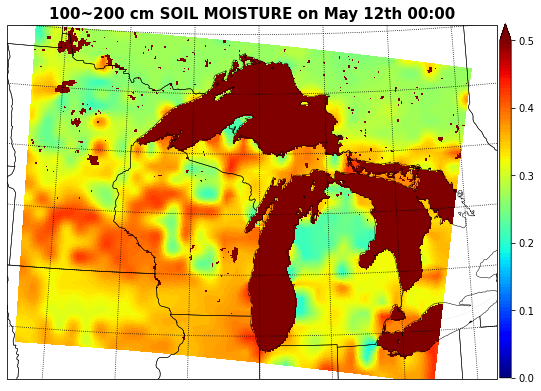

In [27]:
wrfout = Dataset('./wrfout/orig/freeze1/wrfout_d01_2020-05-12_00:00:00')

extent = [-96.2, -79.35, 40.7, 49.52]
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(np.mean(extent[:2]), np.mean(extent[2:])))
ax.set_extent(extent)
ax.add_feature(cartopy.feature.BORDERS, lw=.1, linestyle=':')
ax.add_feature(cartopy.feature.COASTLINE, lw=.1, linestyle=':')
ax.add_feature(cartopy.feature.STATES.with_scale('10m'), lw=.5)
ax.gridlines(color="black", linestyle="dotted", lw=.1)

cmap = plt.get_cmap('jet')
levels = MaxNLocator(nbins=100).tick_values(0, .5)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

pc = plt.pcolormesh(lon, lat, wrfout['SMOIS'][0,3,:,:], cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
plt.title('100~200 cm SOIL MOISTURE on May 12th 00:00', fontsize=15, fontweight='bold')

fig.subplots_adjust(bottom=0, top=0.95, left=0.05, right=0.9)
cb_ax = fig.add_axes([0.905, 0.068, 0.02, 0.82])
cbar = fig.colorbar(pc, cax=cb_ax, ticks=np.arange(0, .6, .1), extend='max')

plt.savefig('./Soil_Moisture/plot/sm_100200cm_05120000.png')

<font size=4 color=blue>Compare wrfout to station observations

In [66]:
sm_s = np.zeros((4, 98))
df1 = pd.read_csv('./Soil_Moisture/sparta.hourly.csv', skiprows=lambda x: x in range(8))
df1 = df1[-483:-314].reset_index(drop=True)
mstr = ['mstr0','mstr1','mstr_90cm','mstr_120cm']
for k in range(4):
    sm_s[k, :49] = df1[mstr[k]][:49]
    sm_s[k, 49:] = df1[mstr[k]][-49:]

In [31]:
sm_w = np.zeros((4, 98))
df2 = pd.read_csv('./Soil_Moisture/williamsburg.hourly.csv', skiprows=lambda x: x in range(8))
df2 = df2[-486:-317].reset_index(drop=True)
mstr = ['mstr0','mstr1','mstr_90cm','mstr_120cm']
for k in range(4):
    sm_w[k, :49] = df2[mstr[k]][:49]
    sm_w[k, 49:] = df2[mstr[k]][-49:]

/data1/study/env_cartopy/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
wrfout = Dataset('./wrfout/orig/freeze1/wrfout_d01_2020-05-12_00:00:00')
lat = wrfout['XLAT'][0,:,:]
lon = wrfout['XLONG'][0,:,:]
y, x = lon.shape

In [40]:
mask = np.load('./var/wrfout_mask.npy')
indy = 0
indx = 0
latmin = 9999
lonmin = 9999
lat0 = 43.1167
lon0 = -85.7560
for i in range(y):
    for j in range(x):
        if mask[i,j]:
            latm = abs(lat[i,j]-lat0)
            lonm = abs(lon[i,j]-lon0)
            if (latm<latmin) and (lonm<lonmin):
                indy = i
                indx = j
                latmin = latm
                lonmin = lonm

sm_sparta = np.zeros((4, 98))
DIR = './wrfout/orig/freeze1/'
fna = [name for name in os.listdir(DIR)]
fna.sort()
fno = len(fna)
for ii in range(fno):
    fnc = Dataset(f'./wrfout/orig/freeze1/{fna[ii]}')
    sm_sparta[:,49+ii] = fnc['SMOIS'][0,:,indy,indx]
    
DIR = './wrfout/orig/freeze2/'
fna = [name for name in os.listdir(DIR)]
fna.sort()
fno = len(fna)
for ii in range(fno):
    fnc = Dataset(f'./wrfout/orig/freeze2/{fna[ii]}')
    sm_sparta[:,ii] = fnc['SMOIS'][0,:,indy,indx]

In [28]:
mask = np.load('./var/wrfout_mask.npy')
indy = 0
indx = 0
latmin = 9999
lonmin = 9999
lat0 = 44.8153
lon0 = -85.4445
for i in range(y):
    for j in range(x):
        if mask[i,j]:
            latm = abs(lat[i,j]-lat0)
            lonm = abs(lon[i,j]-lon0)
            if (latm+lonm) < (latmin+lonmin):
                indy = i
                indx = j
                latmin = latm
                lonmin = lonm

sm_Williamsburg = np.zeros((4, 98))
DIR = './wrfout/orig/freeze1/'
fna = [name for name in os.listdir(DIR)]
fna.sort()
fno = len(fna)
for ii in range(fno):
    fnc = Dataset(f'./wrfout/orig/freeze1/{fna[ii]}')
    sm_Williamsburg[:,49+ii] = fnc['SMOIS'][0,:,indy,indx]
    
DIR = './wrfout/orig/freeze2/'
fna = [name for name in os.listdir(DIR)]
fna.sort()
fno = len(fna)
for ii in range(fno):
    fnc = Dataset(f'./wrfout/orig/freeze2/{fna[ii]}')
    sm_Williamsburg[:,ii] = fnc['SMOIS'][0,:,indy,indx]

Text(0.5, 1.0, 'WRFOUT-OBS Soil Moisture in Sparta')

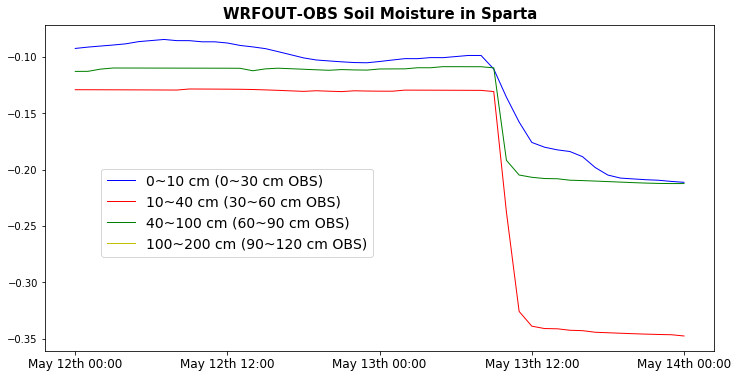

In [92]:
sm = sm_sparta - sm_s

# plt.figure(figsize=(12, 6))
# plt.plot(sm[0, :49], 'b', lw=1)
# plt.plot(sm[1, :49], 'r', lw=1)
# plt.plot(sm[2, :49], 'g', lw=1)
# plt.plot(sm[3, :49], 'y', lw=1)
# plt.xticks(ticks=np.arange(0, 49, 12), labels=['May 8th 00:00', 'May 8th 12:00','May 9th 00:00', 'May 9th 12:00', 'May 10th 00:00'], fontsize=12)
# plt.legend(['0~10 cm (0~30 cm OBS)', '10~40 cm (30~60 cm OBS)', '40~100 cm (60~90 cm OBS)', '100~200 cm (90~120 cm OBS)'], fontsize=14,
#           loc='best', bbox_to_anchor=(0.5, 0.08, 0.5, 0.5))
# plt.title('WRFOUT-OBS Soil Moisture in Sparta', fontsize=15, fontweight='bold')

plt.figure(figsize=(12, 6))
plt.plot(sm[0, 49:], 'b', lw=1)
plt.plot(sm[1, 49:], 'r', lw=1)
plt.plot(sm[2, 49:], 'g', lw=1)
plt.plot(sm[3, 49:], 'y', lw=1)
plt.xticks(ticks=np.arange(0, 49, 12), labels=['May 12th 00:00', 'May 12th 12:00','May 13th 00:00', 'May 13th 12:00', 'May 14th 00:00'], fontsize=12)
plt.legend(['0~10 cm (0~30 cm OBS)', '10~40 cm (30~60 cm OBS)', '40~100 cm (60~90 cm OBS)', '100~200 cm (90~120 cm OBS)'], fontsize=14,
          loc='best', bbox_to_anchor=(0., 0.08, 0.5, 0.5))
plt.title('WRFOUT-OBS Soil Moisture in Sparta', fontsize=15, fontweight='bold')

Text(0.5, 1.0, 'WRFOUT-OBS Soil Moisture in Williamsburg')

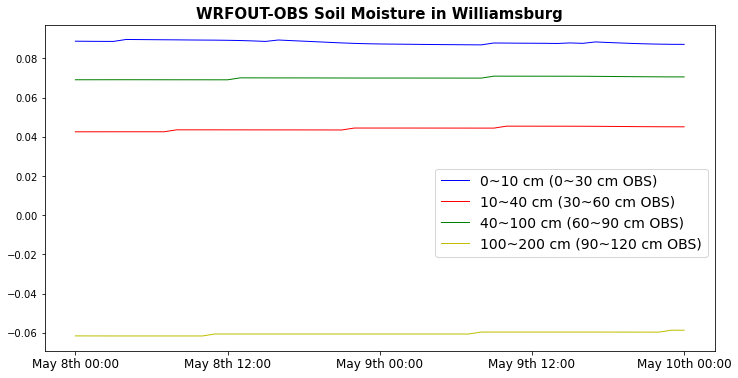

In [33]:
sm = sm_Williamsburg - sm_w

plt.figure(figsize=(12, 6))
plt.plot(sm[0, :49], 'b', lw=1)
plt.plot(sm[1, :49], 'r', lw=1)
plt.plot(sm[2, :49], 'g', lw=1)
plt.plot(sm[3, :49], 'y', lw=1)
plt.xticks(ticks=np.arange(0, 49, 12), labels=['May 8th 00:00', 'May 8th 12:00','May 9th 00:00', 'May 9th 12:00', 'May 10th 00:00'], fontsize=12)
plt.legend(['0~10 cm (0~30 cm OBS)', '10~40 cm (30~60 cm OBS)', '40~100 cm (60~90 cm OBS)', '100~200 cm (90~120 cm OBS)'], fontsize=14,
          loc='best', bbox_to_anchor=(0.5, 0.08, 0.5, 0.5))
plt.title('WRFOUT-OBS Soil Moisture in Williamsburg', fontsize=15, fontweight='bold')

# plt.figure(figsize=(12, 6))
# plt.plot(sm[0, 49:], 'b', lw=1)
# plt.plot(sm[1, 49:], 'r', lw=1)
# plt.plot(sm[2, 49:], 'g', lw=1)
# plt.plot(sm[3, 49:], 'y', lw=1)
# plt.xticks(ticks=np.arange(0, 49, 12), labels=['May 12th 00:00', 'May 12th 12:00','May 13th 00:00', 'May 13th 12:00', 'May 14th 00:00'], fontsize=12)
# plt.legend(['0~10 cm (0~30 cm OBS)', '10~40 cm (30~60 cm OBS)', '40~100 cm (60~90 cm OBS)', '100~200 cm (90~120 cm OBS)'], fontsize=14,
#           loc='best', bbox_to_anchor=(0., 0.08, 0.5, 0.5))
# plt.title('WRFOUT-OBS Soil Moisture in Williamsburg', fontsize=15, fontweight='bold')

In [35]:
# %matplotlib inline
# extent = [-96.2, -79.35, 40.7, 49.52]
# fig = plt.figure(figsize=(8, 6))
# ax = plt.axes(projection=ccrs.AlbersEqualArea(np.mean(extent[:2]), np.mean(extent[2:])))
# ax.set_extent(extent)
# ax.add_feature(cartopy.feature.BORDERS, lw=.1, linestyle=':')
# ax.add_feature(cartopy.feature.COASTLINE, lw=.1, linestyle=':')
# ax.add_feature(cartopy.feature.STATES.with_scale('10m'), lw=.5)
# ax.gridlines(color="black", linestyle="dotted", lw=.1)

# cmap_name = '19color'
# colors= ['#543005','#8c510a','#bf812d','#dfc27d','#f6e8c3','#c7eae5','#80cdc1','#35978f','#01665e','#003c30',
#         '#40004b','#762a83','#9970ab','#c2a5cf','#e7d4e8','#67001f','#b2182b','#d6604d','#f4a582']
# cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=19)
# levels = MaxNLocator(nbins=19).tick_values(1, 20)
# norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

# pc = plt.pcolormesh(lon, lat, wrfout['ISLTYP'][0,:,:], cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
# plt.title('DOMINANT SOIL CATEGORY', fontsize=15, fontweight='bold')

# ax.plot(lon[indy, indx], lat[indy, indx], 'r*', markersize=7, transform=ccrs.PlateCarree())

# fig.subplots_adjust(bottom=0, top=0.95, left=0.05, right=0.9)
# cb_ax = fig.add_axes([0.905, 0.068, 0.02, 0.82])
# cbar = fig.colorbar(pc, cax=cb_ax, ticks=np.arange(1.5, 21))
# cbar.ax.set_yticklabels([soityp['type'][i].strip() for i in range(19)])
# plt.show()

# plt.savefig('./Soil_Moisture/plot/soil_category_star.png')

<Figure size 432x288 with 0 Axes>